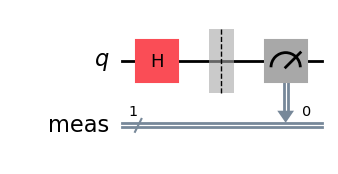

In [64]:
from qiskit.circuit.library import HGate
from qiskit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from PIL import Image
import math


# Simulatoren
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
from qiskit_aer import AerSimulator


# Quantencircuit erstellen
hadamard_gate = HGate()
circuit = QuantumCircuit(1)
circuit.append(hadamard_gate, [0])
circuit.measure_all()

# Quantencircuit anzeigen
circuit.draw("mpl")

In [65]:
# Festlegen des Simulators/Quantencomputers
backend = AerSimulator(method='extended_stabilizer')
 
# Convert to an ISA circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

# Anfrage schicken
job = backend.run(isa_circuit, shots = 100000, memory = True)

result = job.result()
memory = result.get_memory()
print(result)

Result(backend_name='aer_simulator_extended_stabilizer', backend_version='0.17.1', job_id='f0fc0f37-154e-4e07-9760-b70ae1e60d69', success=True, results=[ExperimentResult(shots=100000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 50215, '0x1': 49785}, memory=['0x0', '0x1', '0x1', '0x0', '0x1', '0x0', '0x0', '0x0', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x1', '0x1', '0x1', '0x1', '0x1', '0x0', '0x0', '0x1', '0x1', '0x0', '0x0', '0x1', '0x1', '0x0', '0x0', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x1', '0x1', '0x1', '0x0', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x0', '0x1', '0x1', '0x0', '0x0', '0x1', '0x1', '0x1', '0x1', '0x0', '0x0', '0x1', '0x0', '0x0', '0x1', '0x0', '0x0', '0x1', '0x0', '0x1', '0x0', '0x1', '0x0', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x1', '0x1', '0x1', '0x1', '0x1', '0x0', '0x1', '0x1', '0x0', '0x1', '0x1', '0x0', '0x

In [78]:
def csvBytes():
    bytes_list = [memory[i:i+8] for i in range(0, len(memory), 8)]
    with open("C:/Users/jojot/Documents/Quantum_Computing_Team/Quantum_Computing_Team/Projekt Zufall/Ergebnisse/ergebnisseIBMBytes.csv", "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(bytes_list)

In [79]:
def csvBits(): # Umwandeln in eine Liste von Listen
    memory_rows = [[bit] for bit in memory]
    with open("C:/Users/jojot/Documents/Quantum_Computing_Team/Quantum_Computing_Team/Projekt Zufall/Ergebnisse/ergebnisseIBMBits.csv", "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(memory_rows)

In [80]:
def csvDezimal(memory):
    # Mit Nullen auffüllen, damit die Länge durch 8 teilbar ist
    if len(memory) % 8 != 0:
        memory += ['0'] * (8 - len(memory) % 8)
    
    # In 8er-Gruppen (Bytes) unterteilen
    bytes_list = [memory[i:i+8] for i in range(0, len(memory), 8)]
    
    # Bytes zu Dezimalzahlen umwandeln
    decimal_values = [int(''.join(byte), 2) for byte in bytes_list]
    
    # In CSV schreiben
    with open("C:/Users/jojot/Documents/Quantum_Computing_Team/Quantum_Computing_Team/Projekt Zufall/Ergebnisse/ergebnisseIBMDezimal.csv", "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        for value in decimal_values:
            writer.writerow([value])  # Eine Dezimalzahl pro Zeile


In [84]:
def pngGrauDez(memory):
    # Auffüllen auf Vielfaches von 8
    if len(memory) % 8 != 0:
        memory += ['0'] * (8 - len(memory) % 8)
    
    # In 8er-Blöcke teilen
    bytes_list = [memory[i:i+8] for i in range(0, len(memory), 8)]
    
    # In Dezimalzahlen (0–255) umwandeln
    decimal_values = [int(''.join(byte), 2) for byte in bytes_list]
    
    # Bilddimensionen bestimmen
    width = math.ceil(math.sqrt(len(decimal_values)))
    height = math.ceil(len(decimal_values) / width)
    
    # Werte auffüllen, falls nötig
    decimal_values += [0] * (width * height - len(decimal_values))
    
    # Graustufenbild erzeugen
    img = Image.new("L", (width, height))
    img.putdata(decimal_values)
    
    # 💥 Skalieren (10x)
    scale_factor = 10
    new_size = (width * scale_factor, height * scale_factor)
    img_scaled = img.resize(new_size, resample=Image.NEAREST)  # Kein Weichzeichnen!
    
    # Speichern
    img_scaled.save("C:/Users/jojot/Documents/Quantum_Computing_Team/Quantum_Computing_Team/Projekt Zufall/Ergebnisse/dez_visualisiert.png")


In [87]:
def pngRGBDez(memory):
    if len(memory) % 8 != 0:
        memory += ['0'] * (8 - len(memory) % 8)
    
    # In 8er-Blöcke teilen
    bytes_list = [memory[i:i+8] for i in range(0, len(memory), 8)]
    
    # In Dezimalzahlen (0–255) umwandeln
    decimal_values = [int(''.join(byte), 2) for byte in bytes_list]
    
    # Bilddimensionen bestimmen
    width = math.ceil(math.sqrt(len(decimal_values)))
    height = math.ceil(len(decimal_values) / width)
    
    # Werte auffüllen, falls nötig
    decimal_values += [0] * (width * height - len(decimal_values))
    rgb_values = [(0, 255 - val, val // 2) for val in decimal_values]
    
    # Bild erstellen (RGB-Modus)
    imrgb = Image.new("RGB", (width, height))
    imrgb.putdata(rgb_values)
    
    # 💥 Skalieren (10x)
    scale_factor = 10
    new_size = (width * scale_factor, height * scale_factor)
    img_scaled = imrgb.resize(new_size, resample=Image.NEAREST)  # Kein Weichzeichnen!
    
    # Speichern
    img_scaled.save("C:/Users/jojot/Documents/Quantum_Computing_Team/Quantum_Computing_Team/Projekt Zufall/Ergebnisse/dez_visualisiert_rgb.png")

In [86]:
csvBits()
csvBytes()
csvDezimal(memory)
pngGrauDez(memory)
pngRGBDez(memory)